## Task 1

### Stock Market Predictions with LSTM in Python

In [66]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

### Input Data

In [67]:
Data= pd.read_csv('C:/Users/DataScience/Downloads/Tesla.csv - Tesla.csv.csv')
Data

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.000000,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.420000,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.920000,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.100000,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.000000,15.830000,16.110001,6866900,16.110001
...,...,...,...,...,...,...,...
1687,3/13/2017,244.820007,246.850006,242.779999,246.169998,3010700,246.169998
1688,3/14/2017,246.110001,258.119995,246.020004,258.000000,7575500,258.000000
1689,3/15/2017,257.000000,261.000000,254.270004,255.729996,4816600,255.729996
1690,3/16/2017,262.399994,265.750000,259.059998,262.049988,7100400,262.049988


In [68]:
# choose plotting style

#plt.style.use('fivethirtyeight')
#plt.style.use('dark_background')
#plt.style.use('ggplot')
#plt.style.use('seaborn-whitegrid')
#plt.style.use('bmh')
plt.style.use('seaborn')

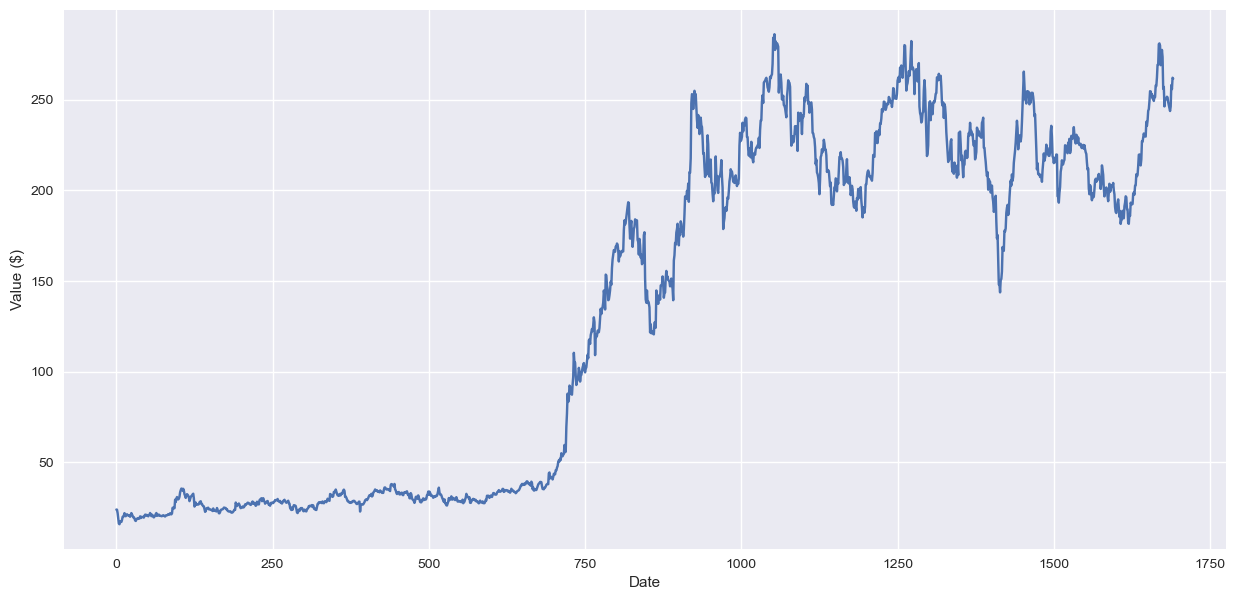

In [69]:
plt.figure(figsize=(15,7))
plt.plot(Data.Close)
plt.xlabel('Date')
plt.ylabel('Value ($)')
plt.rcParams.update({'font.size': 18})
plt.show()

### Understanding the data

In [70]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1692 non-null   object 
 1   Open       1692 non-null   float64
 2   High       1692 non-null   float64
 3   Low        1692 non-null   float64
 4   Close      1692 non-null   float64
 5   Volume     1692 non-null   int64  
 6   Adj Close  1692 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 92.7+ KB


In [71]:
Data.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [72]:
Data.tail()

,Date,Open,High,Low,Close,Volume,Adj Close
1687,3/13/2017,244.820007,246.850006,242.779999,246.169998,3010700,246.169998
1688,3/14/2017,246.110001,258.119995,246.020004,258.000000,7575500,258.000000
1689,3/15/2017,257.000000,261.000000,254.270004,255.729996,4816600,255.729996
1690,3/16/2017,262.399994,265.750000,259.059998,262.049988,7100400,262.049988
1691,3/17/2017,264.000000,265.329987,261.200012,261.500000,6475900,261.500000


In [73]:
Data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [74]:
del Data['Adj Close'] # del Adj CLose cols

In [75]:
Data.set_index('Date',inplace=True) # Set the Date column to index

Data.head() # Checking the first 5 rows of data

,Open,High,Low,Close,Volume
Date,,,,,
6/29/2010,19.000000,25.00,17.540001,23.889999,18766300
6/30/2010,25.790001,30.42,23.299999,23.830000,17187100
7/1/2010,25.000000,25.92,20.270000,21.959999,8218800
7/2/2010,23.000000,23.10,18.709999,19.200001,5139800
7/6/2010,20.000000,20.00,15.830000,16.110001,6866900


C:\Users\DataScience\AppData\Local\Temp\ipykernel_6640\3276437366.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fg.show()


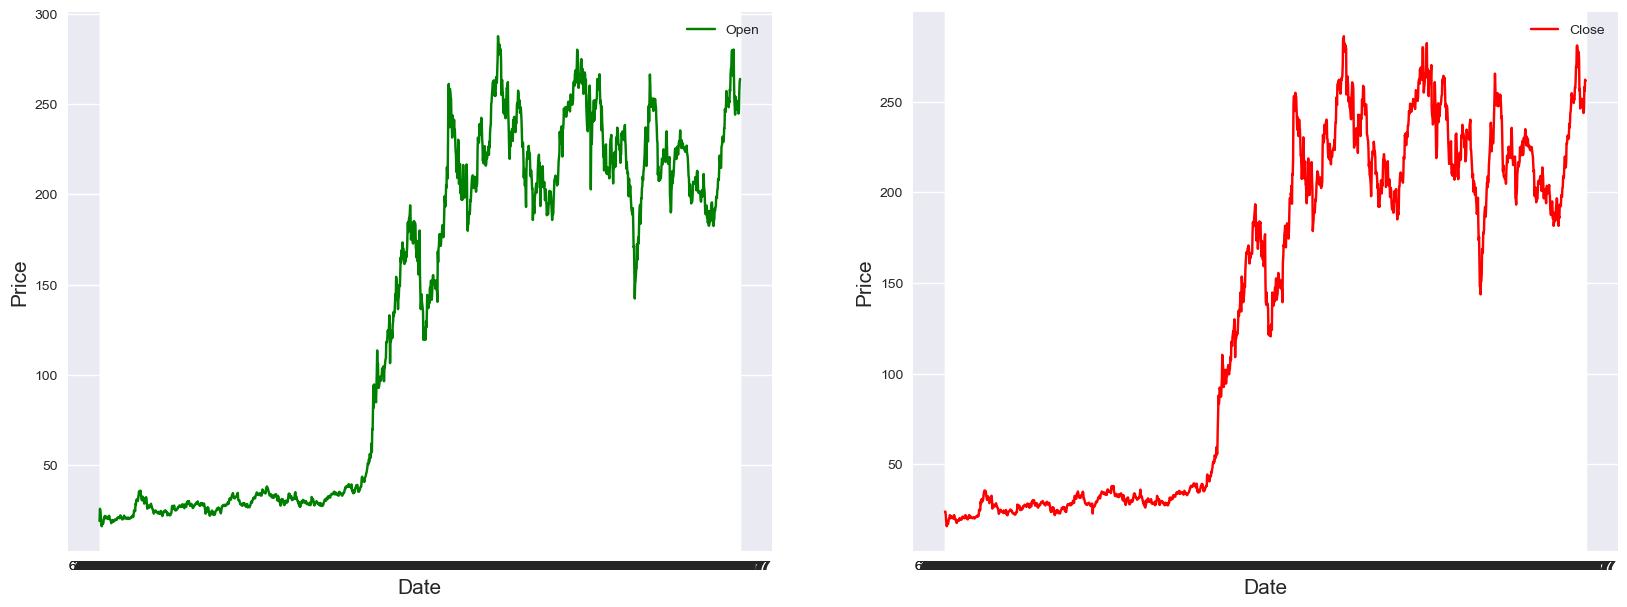

In [27]:
fg, ax =plt.subplots(1,2,figsize=(20,7))
ax[0].plot(Data['Open'],label='Open',color='green')
ax[0].set_xlabel('Date',size=15)
ax[0].set_ylabel('Price',size=15)
ax[0].legend()

ax[1].plot(Data['Close'],label='Close',color='red')
ax[1].set_xlabel('Date',size=15)
ax[1].set_ylabel('Price',size=15)
ax[1].legend()

fg.show()

## Data Pre-Processing

In [28]:
from sklearn.preprocessing import MinMaxScaler
MMS = MinMaxScaler()
Data[Data.columns] = MMS.fit_transform(Data)

In [29]:
Data.shape

(1692, 5)

In [33]:
training_size = round(len(Data) * 0.80) # Selecting 80 % for training and 20 % for testing
training_size
train_data = Data[:training_size]
test_data  = Data[training_size:]

train_data.shape, test_data.shape

((1354, 5), (338, 5))

In [34]:
# Function to create sequence of data for training and testing

def create_sequence(dataset):
  sequences = []
  labels = []

  start_idx = 0

  for stop_idx in range(50,len(dataset)): # Selecting 50 rows at a time
    sequences.append(dataset.iloc[start_idx:stop_idx])
    labels.append(dataset.iloc[stop_idx])
    start_idx += 1
  return (np.array(sequences),np.array(labels))

In [35]:
train_seq, train_label = create_sequence(train_data)
test_seq, test_label = create_sequence(test_data)
train_seq.shape, train_label.shape, test_seq.shape, test_label.shape

((1304, 50, 5), (1304, 5), (288, 50, 5), (288, 5))

## Creating LSTM model

In [61]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional

#
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape = (train_seq.shape[1], test_seq.shape[2])))

model.add(Dropout(0.1)) 
model.add(LSTM(units=50))

model.add(Dense(2))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_18 (LSTM)              (None, 50, 50)            11200     
                                                                 
 dropout_17 (Dropout)        (None, 50, 50)            0         
                                                                 
 lstm_19 (LSTM)              (None, 50)                20200     
                                                                 
 dense_9 (Dense)             (None, 2)                 102       
                                                                 
Total params: 31,502
Trainable params: 31,502
Non-trainable params: 0
_________________________________________________________________


In [64]:
test_predicted = model.predict(test_seq)
test_predicted[:5]

9/9 [==============================] - 0s 20ms/step


array([[-0.04853056, -0.14974463],
       [-0.04861218, -0.14817767],
       [-0.04863306, -0.1465328 ],
       [-0.04858182, -0.14512236],
       [-0.04822701, -0.14401443]], dtype=float32)

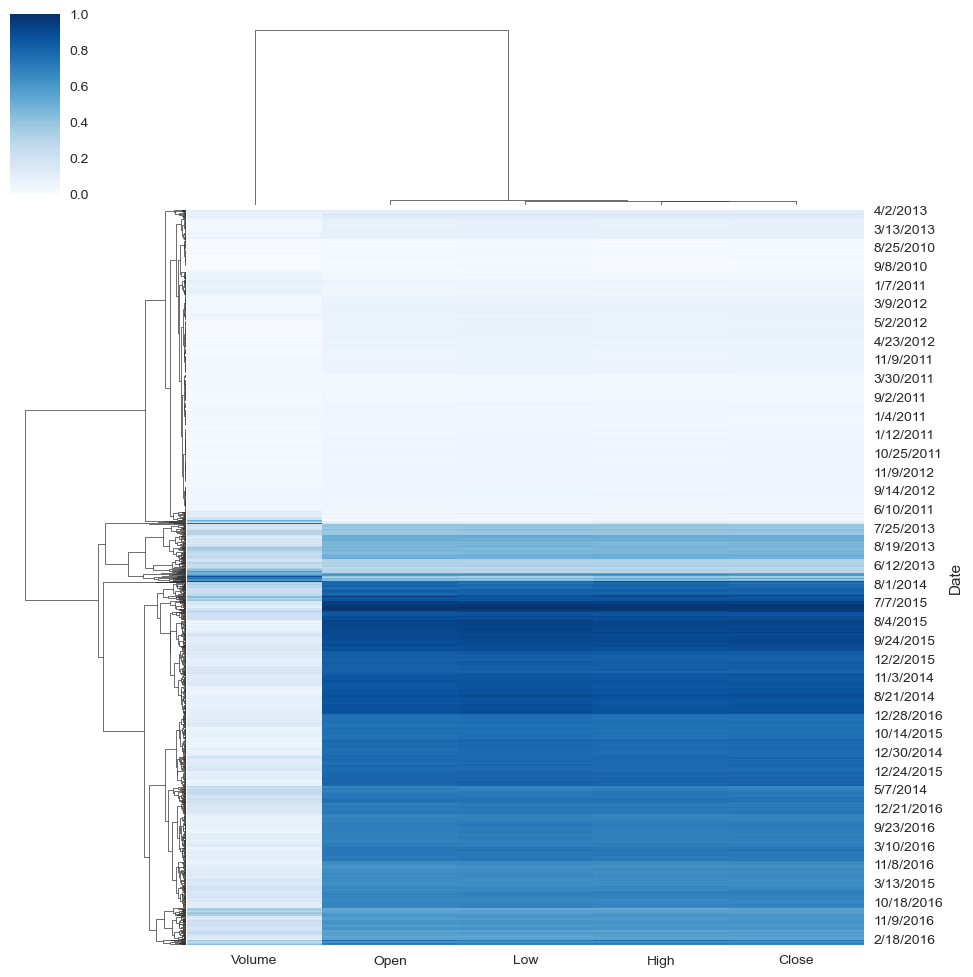

In [12]:
#Plot clustermap
sns.clustermap(df, cmap='Blues', standard_scale=1)
plt.show()

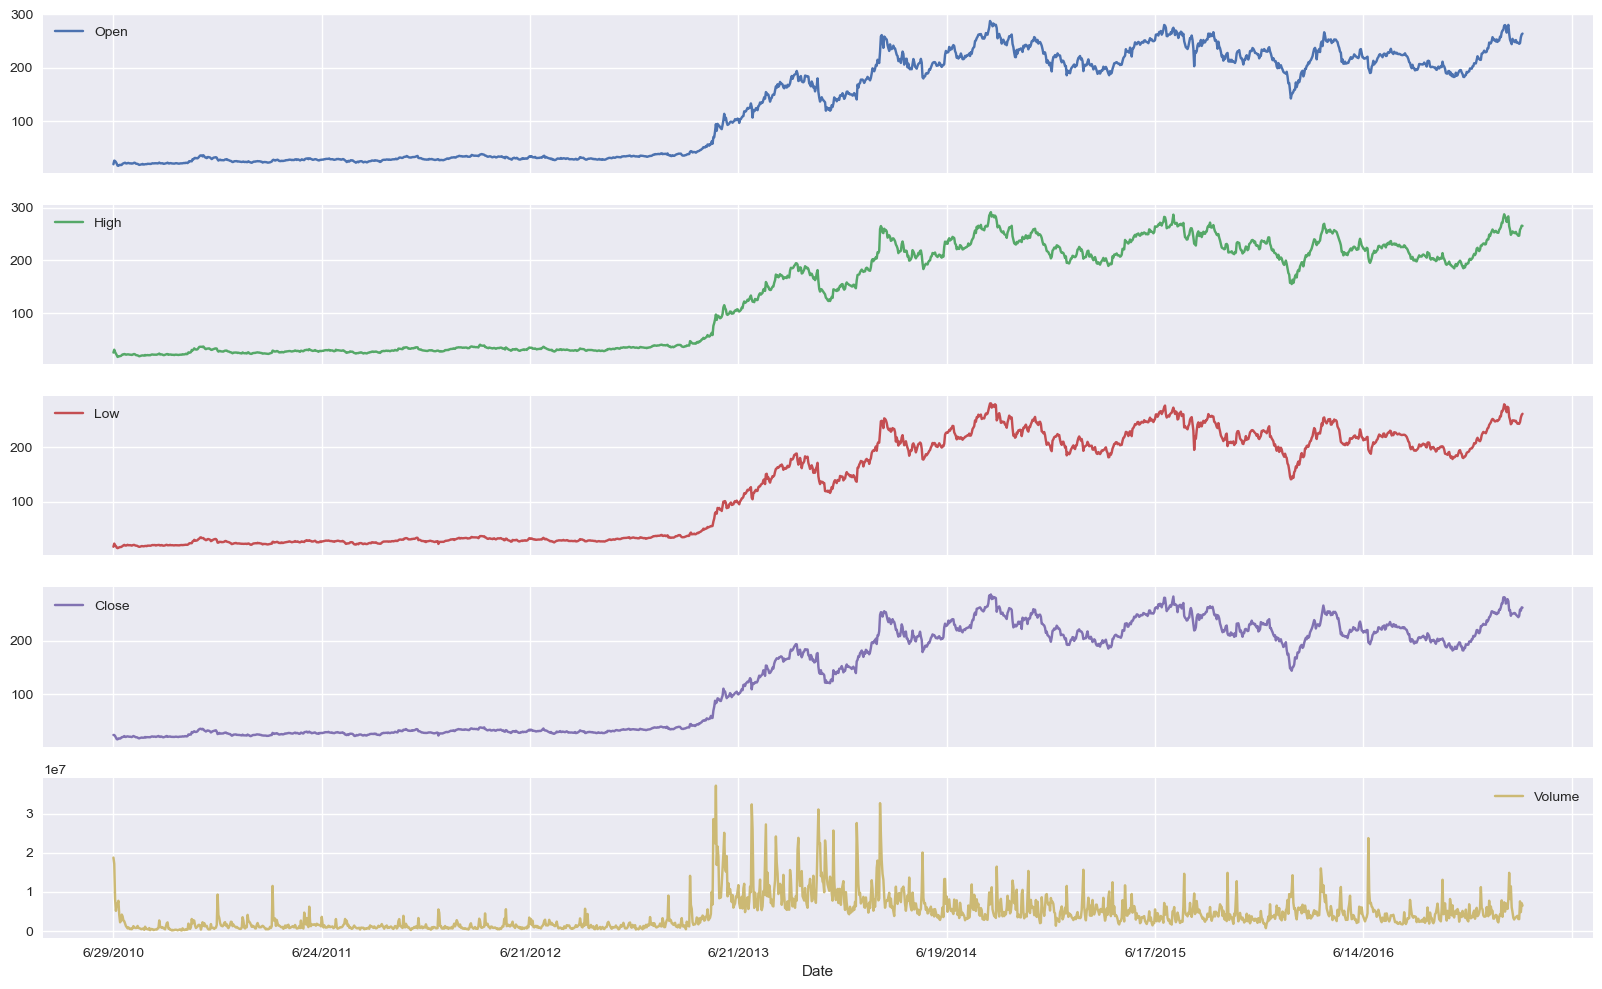

In [13]:
df.plot(subplots=True, figsize=(20, 12))
plt.show()

### Create the Stacked LSTM model

In [87]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [88]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_21 (LSTM)              (None, 100, 50)           10400     
                                                                 
 lstm_22 (LSTM)              (None, 100, 50)           20200     
                                                                 
 lstm_23 (LSTM)              (None, 50)                20200     
                                                                 
 dense_11 (Dense)            (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________
